# 01. K-평균 알고리즘 이해

<장점><br>
일반적인 군집화에서 가장 많이 활용되는 알고리즘<br>
알고리즘이 쉽고 간결함
<br><br>
<단점><br>
거리 기반 알고리즘이기 떄문에 속성 개수 많을 경우 군집화 정확도 떨어짐 -> PCA를 해야할 수 잇음<br>
반복 수행할때, 횟수가 많을 경우 수행 시간이 느려짐<br>
몇개의 군집을 선택해야할지 가이드하기가 어려움

## 사이킷런 KMeans 클래스 소개
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>

|하이퍼 파라미터|의미|
|:------|:------|
|n_clusters| 군집화할 개수|
|init| 초기 군집 중심점의 좌표 설정할 방식. 일반적으로 k-means++방식|
|max_iter| 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료|


|속성|의미|
|:------|:------|
|labels_| 각 데이터 포인트가 속한 군집 중심점 레이블|
|cluster_centers_| 각 군집 중심점 좌표(Shape는 [군집 개수, 피처개수]). 이를 통해 군집 중심점 좌표가 어딘지 시각화 가능|

##  K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [4]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
# 타겟과 클러스터별로 묶을거고, 그에 해당하는 sepal_legnth개수가 몇개인가?
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count() 

In [5]:
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

# inertia를 활용한 elbow method 시각화

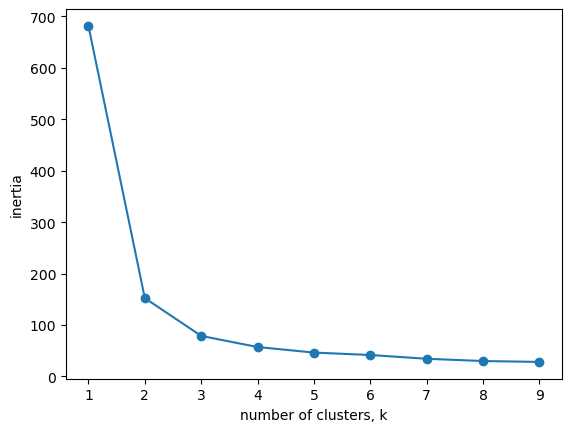

In [8]:
feature = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

ks = range(1,10)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [14]:
# 시각화를 하겠습니다. 근데 features가 4개니까 PCA를 해서 2개로 바꿔볼게요
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_tran = pca.fit_transform(iris.data)
iris_df['pca_x'] = pca_tran[:,0]
iris_df['pca_y'] = pca_tran[:,1]
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [32]:
patches.Rectangle(
    (1.5, -0.5), width=0.5, height=1.5,                  # (x, y), width, height
      edgecolor = 'deeppink',
      facecolor = 'lightgray',
      fill=True
   )
plt.show()

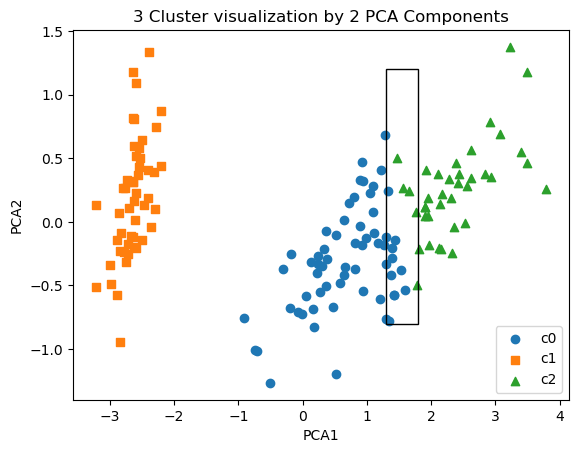

In [51]:
# 0, 2이 분리가 안되유 ㅠ
fig, ax = plt.subplots()
ax.scatter(iris_df.loc[m0,'pca_x'], iris_df.loc[m0,'pca_y'], marker='o')
ax.scatter(iris_df.loc[m1,'pca_x'], iris_df.loc[m1,'pca_y'], marker='s')
ax.scatter(iris_df.loc[m2,'pca_x'], iris_df.loc[m2,'pca_y'], marker='^')
ax.add_patch(
    patches.Rectangle(
    (1.3, -0.8), width=0.5, height=2,                  # (x, y), width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False
   ))    
plt.legend(labels=['c0','c1','c2'])
plt.title('3 Cluster visualization by 2 PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성
군집화용 데이터 생성기 : make_blobs(), make_classification()<br>
make_blobs(): 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음<br>
make_classification(): 노이즈를 포함한 데이터를 만드는데 유용함 <br>
그외 : make_circle(), make_moon()<br>

In [52]:
from sklearn.datasets import make_blobs

In [90]:
# 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) # cluster_std: 표준편차 0.8
print(X.shape, y.shape)

(200, 2) (200,)


In [91]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [92]:
cluster_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
cluster_df['target']=y
cluster_df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


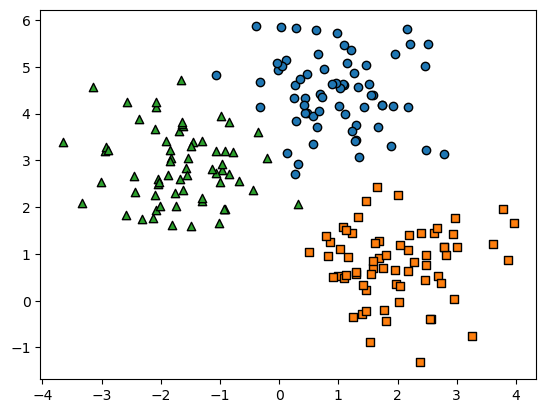

In [93]:
markers=['o','s','^']
for target in np.unique(y): # target이라는건 y의 유니크 값 (0,1,2)
    target_cluster = cluster_df[cluster_df['target']==target] # target_cluster는 cluster_df['target']이 target(0,1,2)
    plt.scatter(target_cluster['ftr1'],target_cluster['ftr2'], edgecolors='k',
                marker=markers[target])

In [94]:
unique_labels = np.unique(cluster_labels)
centers[1]

array([-1.70636483,  2.92759224])

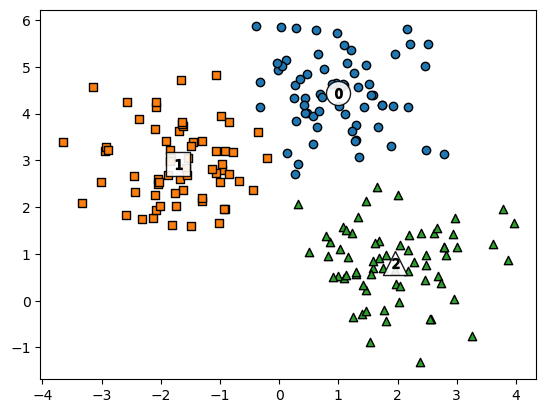

In [95]:
# 군집화를 해봅시당
kmeans = KMeans(n_clusters=3, max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X) # 실수로 transform 쓰면 큰일나요 ?ㅎㅎ
cluster_df['kmeans_label'] =cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출!! 이거 중요!
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

# 시각화를 시작합니다
markers=['o','s','^']
# 군집된 label별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label] # 좌표 값이에요
    plt.scatter(label_cluster['ftr1'], label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    
    # 이제 중심을 넣어봅시다
    plt.scatter(center_x_y[0], center_x_y[1], s=300, color='white', alpha=0.9, edgecolors='k', marker=markers[label]) # 원 만들깅
    plt.scatter(center_x_y[0], center_x_y[1], s=50, color='k', edgecolors='k', marker='$%d$' % label) # 글씨 쓰기
plt.show()

In [96]:
cluster_df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

# 

# 02. 군집 평가(Cluster Evaluation)

##  실루엣 분석의 개요
다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐저 있는가?에 대한 평가 지표<br>
$$s(i) = {(b(i)-a(i)) \over (max(a(i),b(i))} , \;\; max(a,b) : a와 b중 큰 숫자$$ <br><br>
좋은 군집화란? <br>
1. 전체 실루엣 계수가 1에 가까울 수록 좋음<br>
2. 개별 군집의 평균값의 편차가 작아야함. 즉, 모든 군집의 실루엣 계수 평균값이 비슷해야함!

##  붓꽃 데이터 세트를 이용한 군집 평가

In [107]:
# 실루엣 분석 평가 지표 값을 구하기 위한 API
from sklearn.metrics import silhouette_samples, silhouette_score

In [109]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300, random_state=0).fit(iris_df)
iris_df['cluster'] = kmeans.labels_

In [111]:
# 개별 데이터에 실루엣 계수 구하기
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('실루엣샘플 return 값의 shape', score_samples.shape)

실루엣샘플 return 값의 shape (150,)


In [112]:
# 실루엣 계수 칼럼 추가
iris_df['sil_coeff'] = score_samples

In [116]:
# 모든 데이터의 평균 실루엣 계수 값 구하기
avg_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터 세트 실루엣 분석 score: {0:.3f}'.format(avg_score))
iris_df.head(3) # 1번 군집의 실루엣 계수값이 대체로 높네요?

붓꽃 데이터 세트 실루엣 분석 score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,sil_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [119]:
# 바보. 이렇게 하면 오래 걸리잖아 groupby를 쓰자!
print('0번 클러스터의 실루엣 평균 score:',iris_df[iris_df['cluster']==0]['sil_coeff'].mean())
print('1번 클러스터의 실루엣 평균 score:',iris_df[iris_df['cluster']==1]['sil_coeff'].mean())
print('2번 클러스터의 실루엣 평균 score:',iris_df[iris_df['cluster']==2]['sil_coeff'].mean())

0번 클러스터의 실루엣 평균 score: 0.41731992154093284
1번 클러스터의 실루엣 평균 score: 0.7981404884286225
2번 클러스터의 실루엣 평균 score: 0.4511050604340127


In [120]:
iris_df.groupby('cluster')['sil_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: sil_coeff, dtype: float64

## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


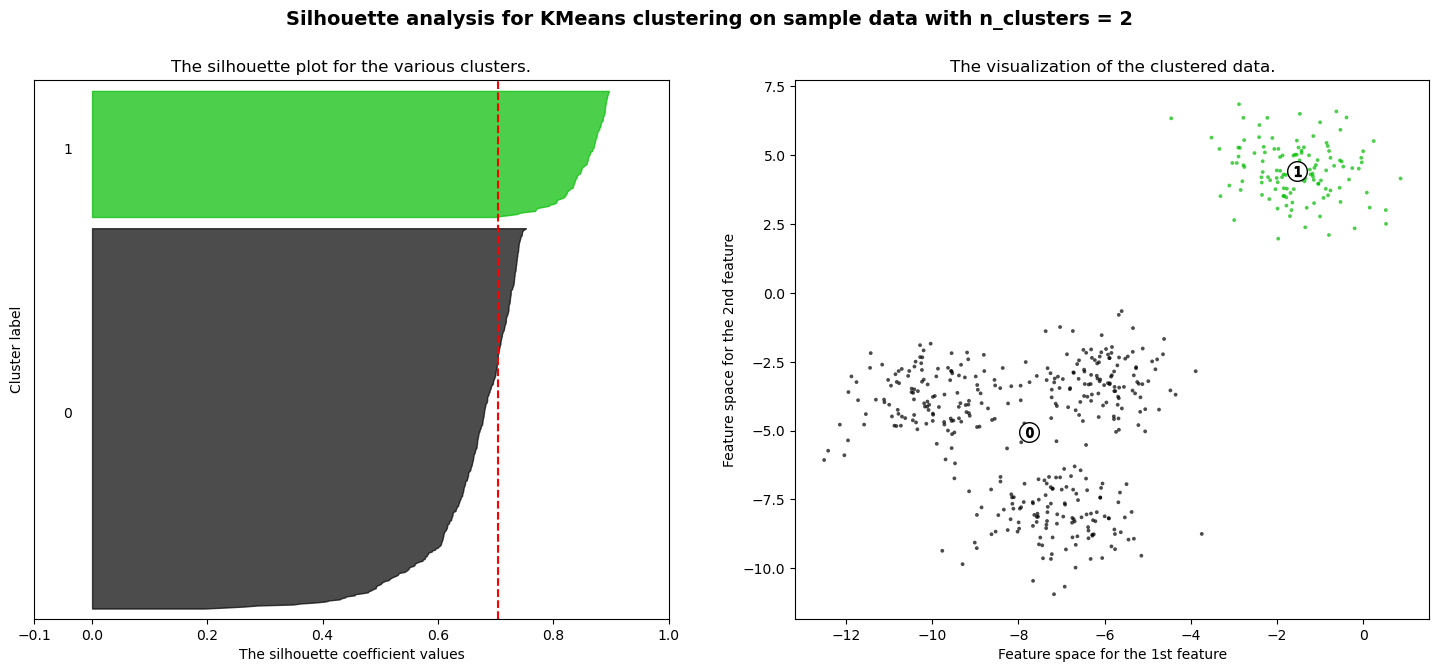

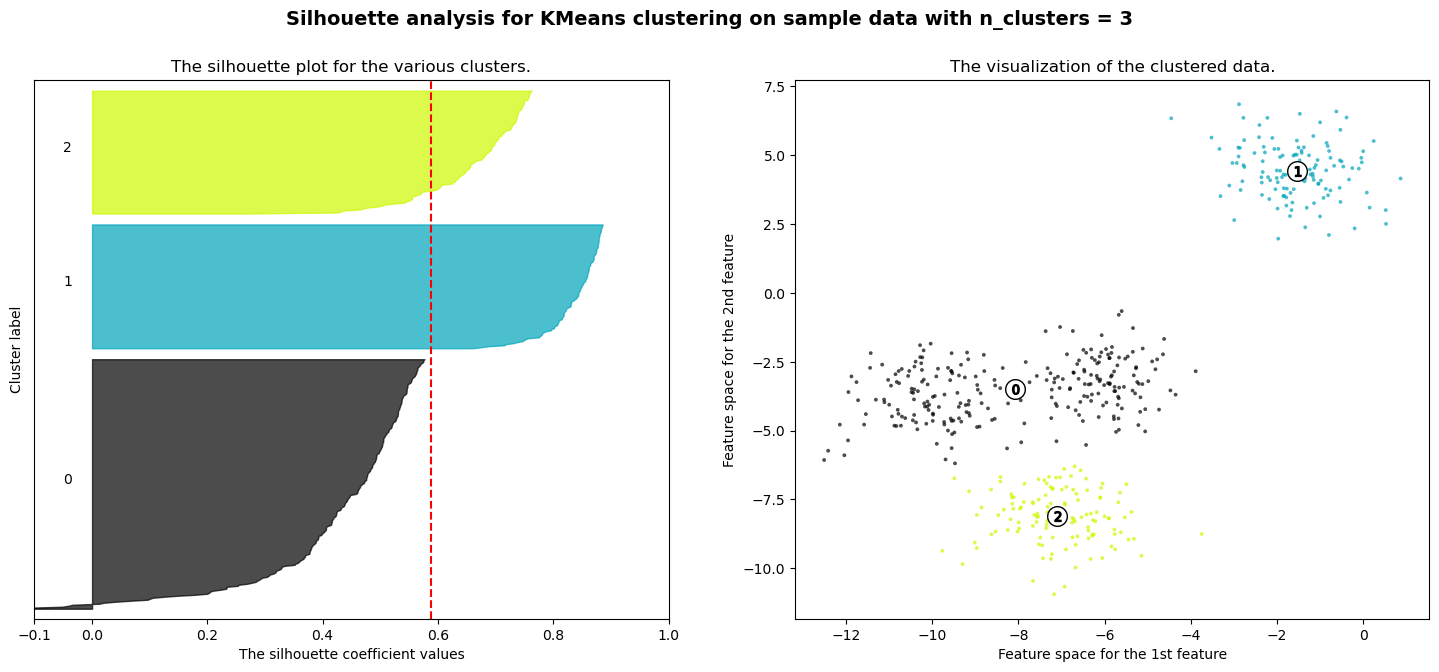

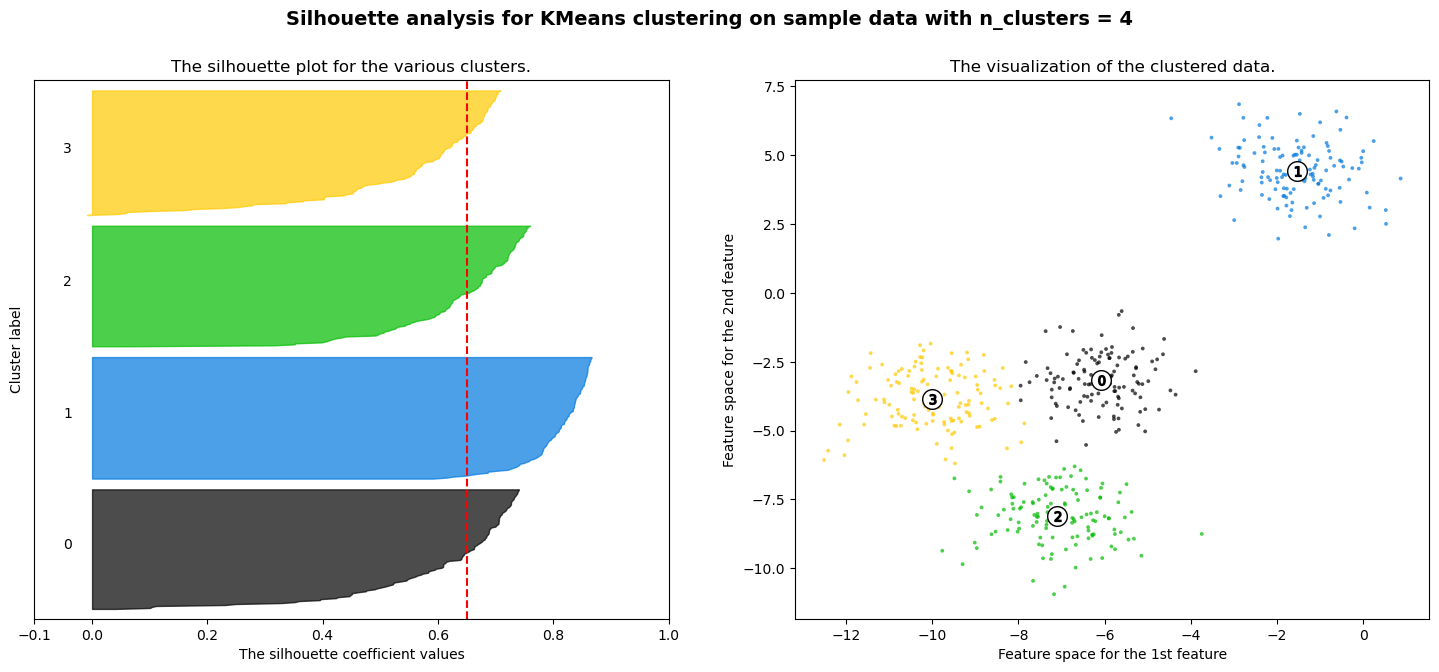

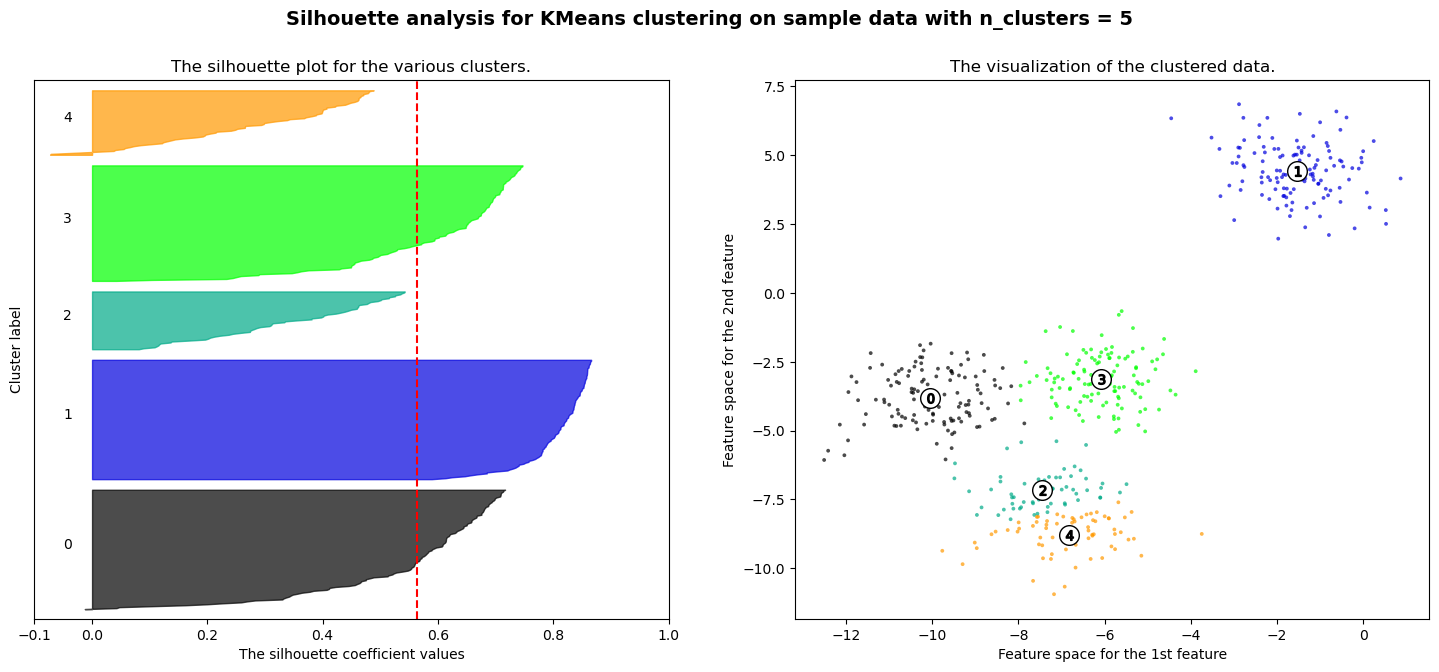

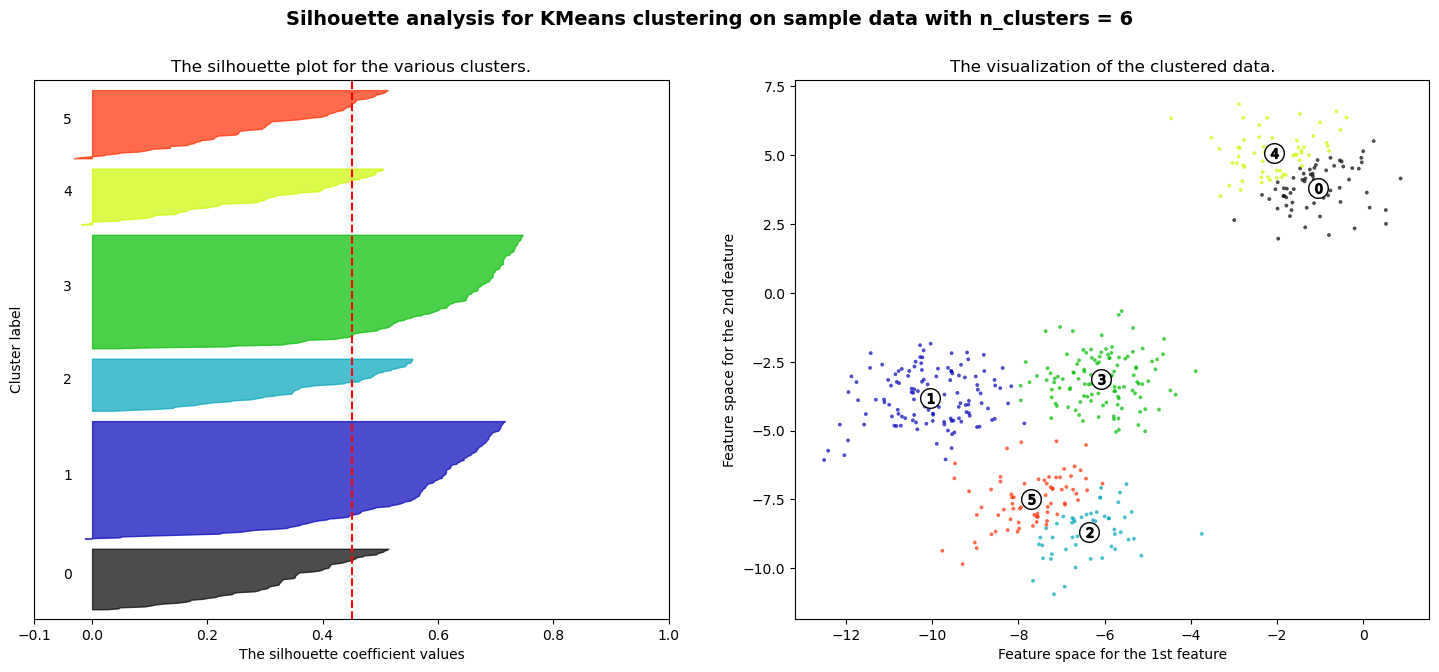

In [134]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10) # 만약 n_init= 'auto'로 되어 있을 경우, 에러 뜹니다! 
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [137]:
# 시각화 간단하게! 군집개수를 변화시키며, 개별 군집별 펴균 실루에 계수값 시각화해서 군집 개수 정하는데 도움을 줌
def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' 
                           'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7) # fill_betweenx():수직 방향의 곡선 사이 채우기
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [143]:
# visualize_silhouette([2,3,4,5], X_features) 형태로 부르면됨!
# centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
# center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))
# 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10,10), shuffle=True, random_state=1)

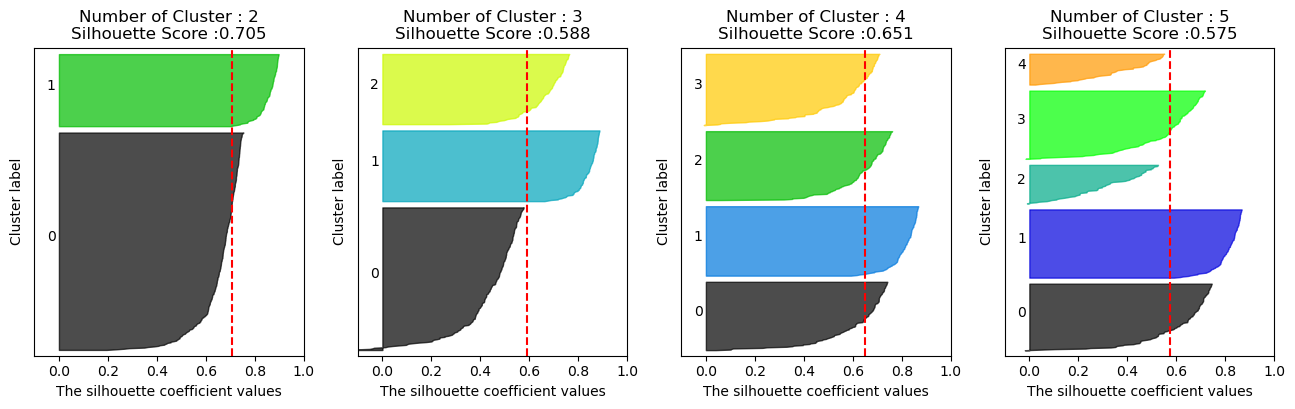

In [144]:
visualize_silhouette([2,3,4,5], X)

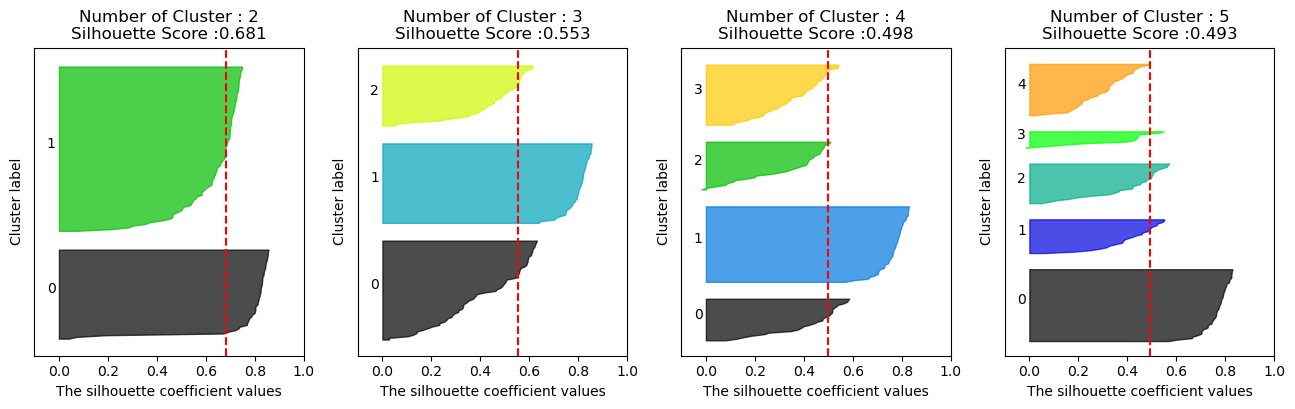

In [146]:
# iris 데이터에서 가장 좋아 보이는거! -> 2개가 제일 나아보이죵?
visualize_silhouette([2,3,4,5], iris.data)

# 

# 03. 평균 이동

## 평균 이동(Mean Shift)의 개요
k-mean이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는것에 반해, 평균 이동은 중심을 데이터가 모여있는 밀도가 높은 곳으로 이동<br>
$$ KDE = {{1} \over{nh}} \sum K({x-x_i \over h}), \; K: 커널함수,\;  x: 확률변수값,\;  x_i: 관측값,\;  h: 대역폭(bandwidth)$$ <br>
h는 평활화 하는데 적용되며, 클수록 부드러워짐<br>
장점<br>
유연한 군집화가 가능<br>
이상치의 영향력이 크지 않음<br>
군집의 개수를 정할 필요가 없음
<br><br>
단점<br>
수행시간이 오래 걸림<br>
bandwidth의 크기 따라 군집화 영향도가 큼<br><br>
평균 이동 군집화 기법은 분석 업무 기반 데이터 보다 컴퓨터 비전 영역에 많이 사용됨

In [147]:
import numpy as np
from sklearn.cluster import MeanShift

In [150]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8) # bandwidth는 대역폭값을 나타냄
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 및 개수: ', np.unique(cluster_labels, return_counts=True)) # 자동으로 군집화를 시켜줍니다 하하

cluster labels 유형 및 개수:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([57, 60, 51, 15, 10,  7], dtype=int64))


In [151]:
meanshift = MeanShift(bandwidth=1) # bandwidth는 대역폭값을 나타냄
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 및 개수: ', np.unique(cluster_labels, return_counts=True))

cluster labels 유형 및 개수:  (array([0, 1, 2], dtype=int64), array([67, 67, 66], dtype=int64))


In [152]:
# 최적화된 bandwidth 구하는 방법을 알려주는 API
from sklearn.cluster import estimate_bandwidth

In [153]:
bandwidth = estimate_bandwidth(X)
print('bandwidth values: ', round(bandwidth,3)) # 이걸로 해보새욤

bandwidth values:  1.816


In [154]:
cluster_df= pd.DataFrame(X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

In [155]:
# 최적의 bandwidth 찾기
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth) # bandwidth는 대역폭값을 나타냄
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 및 개수: ', np.unique(cluster_labels, return_counts=True))

cluster labels 유형 및 개수:  (array([0, 1, 2], dtype=int64), array([67, 67, 66], dtype=int64))


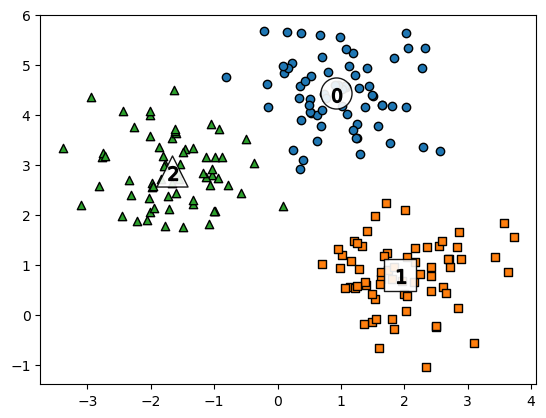

In [175]:
cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label']==label]
    # 군집별 다른 마커 적용
    plt.scatter(label_cluster['ftr1'], label_cluster['ftr2'],edgecolors='k', marker=markers[label])
    
    # 군집별 중심 적용
    center_x_y = centers[label]
    plt.scatter(center_x_y[0], center_x_y[1], s=500, color='white',edgecolors='k', alpha=0.9, marker=markers[label])
    plt.scatter(center_x_y[0], center_x_y[1]-0.03, s=100, color='k', edgecolors='k', marker='$%d$' % label)
    
plt.show()

In [177]:
# target값이랑 meanshift_label 비교해봅시당
cluster_df.groupby('target')['meanshift_label'].value_counts()

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64

# 

# 04. GMM(Gaussian Mixture Model)

## GMM(Gaussian Mixture Model) 소개
확률 기반 군집화 <br>
여러 개의 가우시안 분포(정규분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식<br>
모수추정을 함. (1)일반적으로 개별 정규분포의 평균과 분산, (2)각 데이터가 어떤 정규 분포에 해당되는지의 확률을 추정함

In [180]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['target'] = iris.target

In [189]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과 저장
iris_df['gmm_cluster'] = gmm_cluster_labels

print('GMM 결과 값')
print(iris_df.groupby('target')['gmm_cluster'].value_counts())

print('\nKmeans 결과값')
print(iris_result)

GMM 결과 값
target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

Kmeans 결과값
target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


## GMM과 K-means 비교

In [190]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True): # clusterobj: 군집 수행 객체, make_blobs생성일 경우 None 입력
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter: # 사이킷런 클러스터 객체가 군집 중심좌료를 제공하면 T, 아니면 F
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

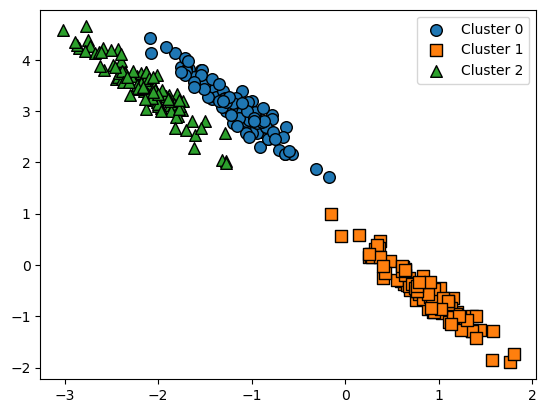

In [193]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std = 0.5, random_state=0)

# 길게 늘어난 타원형 데이터 세트 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# 피처 데이터 세트와 make_blobs 의 y 결과값을 DF로 저장
cluster_df = pd.DataFrame(X_aniso, columns = ['ftr1','ftr2'])
cluster_df['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커 표시!
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

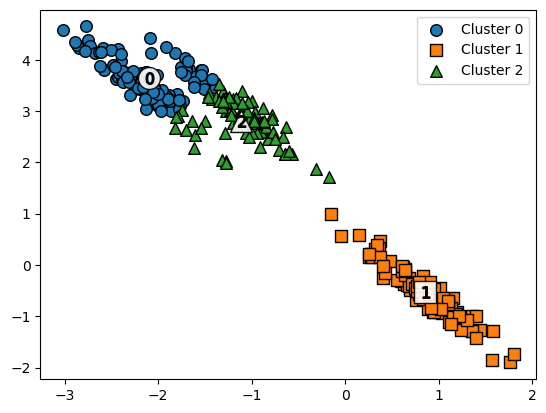

In [199]:
# 거리기반으로 군집화 했을때, 어떻게 군집화 되는지 봅시다.
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
cluster_df['kmeans_label'] = kmeans_label
visualize_cluster_plot(kmeans, cluster_df, 'kmeans_label', iscenter=True)
# 엉망임! 대체로 kmeans는 원형 형태를 띔 

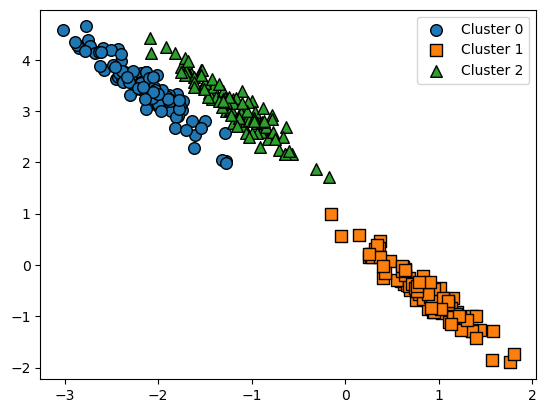

In [205]:
# GMM으로 해봅시다
gmm_label = GaussianMixture(n_components=3, random_state=0).fit_predict(X_aniso)
cluster_df['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, cluster_df, 'gmm_label', iscenter=False) # Gaussianmixture은 중심 클러스터속성이 없어욤 ->iscenter=False

In [209]:
print('### K Means clustering ###')
print(cluster_df.groupby('target')['kmeans_label'].value_counts())
print('\n### GMM clustering ###')
print(cluster_df.groupby(['target'])['gmm_label'].value_counts()) # -> 훨씬 잘됨! 그러나 시간이 오래걸려요...ㅠㅠ

### K Means clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### GMM clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# 

# DBSCAN

## DBSCAN 개요
밀도 기반 군집화<br>
내부 원 모양 및 외부의 원 모향 형태 분포는 구별할때 용이함 -> 기하학적 복잡 분포도가진 데이터 세트에서 군집화 잘 수행 <br><br>

입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역 (eps)<br>
최소 데이터 개수 (min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수 (min_samples)<br><br>

https://velog.io/@gjtang/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD-%EA%B0%80%EC%9D%B4%EB%93%9C-Section7

|데이터 포인트|정의|
|:----|:----|
|핵심 포인트(Core Point) | 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우의 해당 데이터|
|이웃 포인트(Neighbor Point) | 주변 영역 내에 위치한 타 데이터|
|경계 포인트(Border Point) | 핵심 포인트는 아니지만, 핵심 포인트를 이웃 포인트로 가지고 있는 데이터|
|잡음 포인트(Noise Poinrt) | 최소 데이터 개수 이상의 이웃포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터|


## DBSCAN 적용하기 - 붓꽃 데이터 세트

In [216]:
from sklearn.cluster import DBSCAN
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean') # min_samples는 자기도 포함하기 때문에 +1을 한값을 쓰기!, 유클리디안 거리사용
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['target'] = iris.target
iris_df['dbscan_labels'] = dbscan_labels

iris_df.groupby('target')['dbscan_labels'].value_counts() # -1이 노이즈! 2개가 더 낫다고 아까 실루엣 계수에서 봤음!

target  dbscan_labels
0        0               49
        -1                1
1        1               46
        -1                4
2        1               42
        -1                8
Name: dbscan_labels, dtype: int64

In [217]:
from sklearn.decomposition import PCA
# 2차원으로 변경!
pca = PCA(n_components=2, random_state=0)
pca_trans = pca.fit_transform(iris.data)
pca_trans

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [218]:
pca.fit(iris.data).explained_variance_ratio_

array([0.92461872, 0.05306648])

In [219]:
iris_df['ftr1'] = pca_trans[:,0] # pca 1
iris_df['ftr2'] = pca_trans[:,1] # pca 2

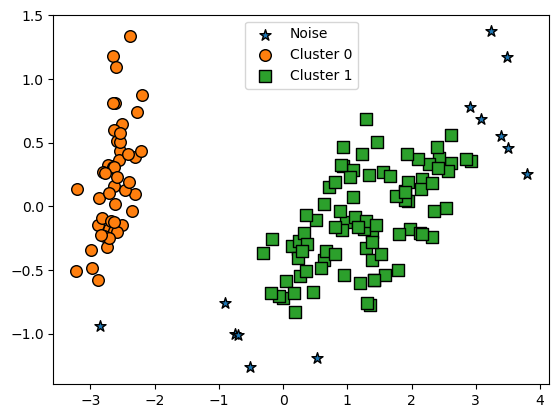

In [222]:
# eps = 0.6일때
visualize_cluster_plot(dbscan, iris_df, 'dbscan_labels', iscenter=False)

In [224]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['target'] = iris.target
iris_df['dbscan_labels'] = dbscan_labels

In [225]:
iris_df.groupby('target')['dbscan_labels'].value_counts() # 노이즈가 바뀌었습니다!

target  dbscan_labels
0        0               50
1        1               50
2        1               47
        -1                3
Name: dbscan_labels, dtype: int64

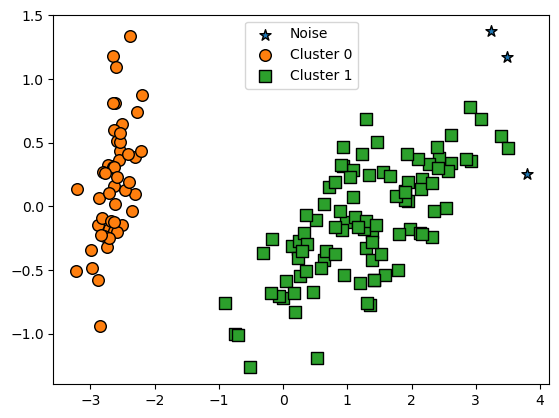

In [226]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_labels', iscenter=False) # 만약 min_samples를 늘리면 노이즈가 또 늘어남!

## DBSCAN 적용하기 - make_circles() 데이터 세트
Kmeans, GMM 모두 이상하게 나옵니다!

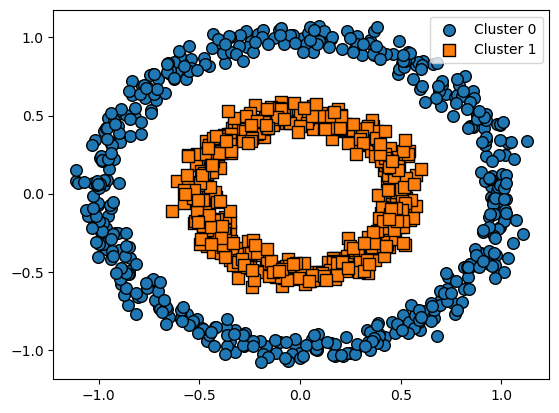

In [228]:
from sklearn.datasets import make_circles
# noise: 노이즈 세트 비율, factor: 외부 원과 내부 원 scale 비율
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5 ) 

cluster_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
cluster_df['target']=y

visualize_cluster_plot(None, cluster_df, 'target',False)

# 

# 06. 군집화 실습 - 고객 세그먼테이션

lnvoiceNo : 주문 번호, C로 시작하는것은 취소 주문 <br>
StockCode : 제품 코드<br>
Description : 제품 설명<br>
Quantity : 주문 제품 건수<br>
InvoiceDate : 주문 일자<br>
UnitPrice : 제품 단가 <br>
CustomerID : 고객 번호<br>
Country : 국가명(주문 고객의 국적)

In [231]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [234]:
retail_df = pd.read_excel('군집화(6장).xlsx')

In [235]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [236]:
# 결측치 존재
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [239]:
retail_df = retail_df[retail_df['Quantity']>0] # 오류 데이터 삭제 -> 실제로는 오류 데이터가 아님..!! 반환한다는 뜻
retail_df = retail_df[retail_df['UnitPrice']>0] # 오류 데이터 삭제 -> 가격
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [241]:
retail_df['Country'].value_counts()[:5] # 상위 5개 국가만 봅시다

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [243]:
retail_df = retail_df[retail_df['Country']=='United Kingdom'] # 영국만 봐야징

## RFM 기반 데이터 가공
고객 레벌 별 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 세그먼테이션 수행

In [244]:
# 파생변수 생성
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
# 고객 아이디 수치화
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [251]:
print(retail_df['CustomerID'].value_counts().head(5),'\n') # .head(5)를 [:5]로 써도 됨
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64 

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [255]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [261]:
# DF의 groupby()의 다중 연산을 위해 agg()이용
# Recency는 InvoiceDate 칼럼의 amx()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggr = {
    'InvoiceDate' : 'max',
    'InvoiceNo' : 'count',
    'sale_amount' : 'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggr)
cust_df = cust_df.rename(columns={'InvoiceDate':'Recency',
                                  'InvoiceNo':'Frequency',
                                  'sale_amount':'Monetray'}
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetray
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [262]:
import datetime as dt
cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1) # 오늘 날짜를 만들기 위해
print('cust_df 로우와 컬럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetray
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


## RFM 기반 고객 세그먼테이션

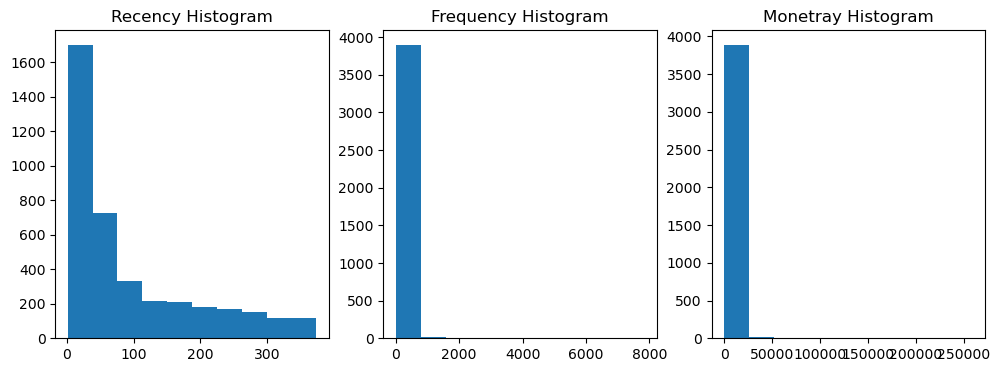

In [265]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetray Histogram')
ax3.hist(cust_df['Monetray'])
plt.show()

In [269]:
cust_df.describe()

,CustomerID,Recency,Frequency,Monetray
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,92.742092,90.388010,1864.385601
std,1576.594671,99.533485,217.808385,7482.817477
min,12346.000000,1.000000,1.000000,3.750000
25%,14208.750000,18.000000,17.000000,300.280000
50%,15569.500000,51.000000,41.000000,652.280000
75%,16913.250000,143.000000,99.250000,1576.585000
max,18287.000000,374.000000,7847.000000,259657.300000


In [278]:
from scipy.stats import skew
# 왜도 난리났네 -> 군집화가 안됩니다..
# object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = cust_df.dtypes[cust_df.dtypes !='object'].index
# cust_df 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환, apply(lambda x: x)로 왜도 호출
skew_features = cust_df[features_index].apply(lambda x : skew(x))
skew_features

CustomerID    -0.011525
Recency        1.244516
Frequency     18.661633
Monetray      20.190729
dtype: float64

In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X_features = cust_df[['Recency','Frequency','Monetray']].values # 값만 가져오는거!
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

In [281]:
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.592


In [283]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

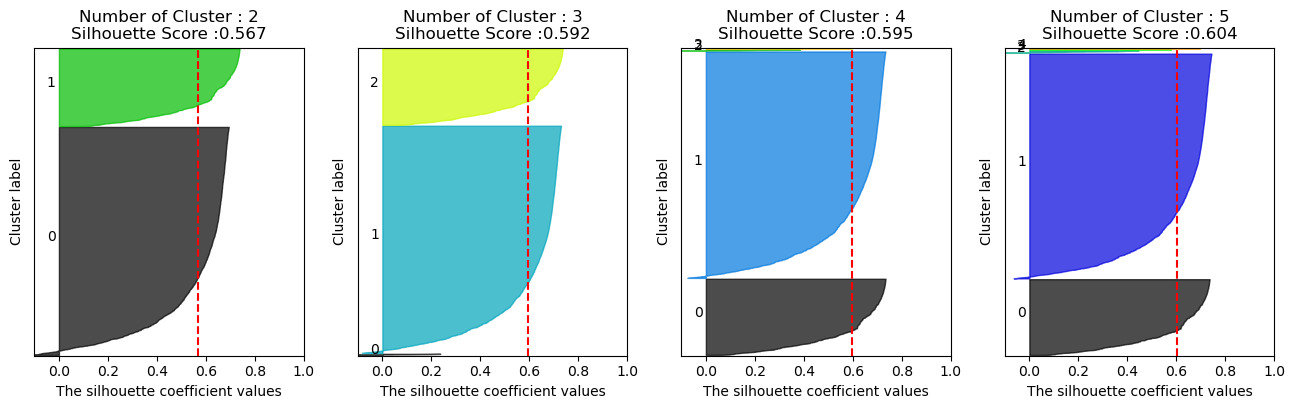

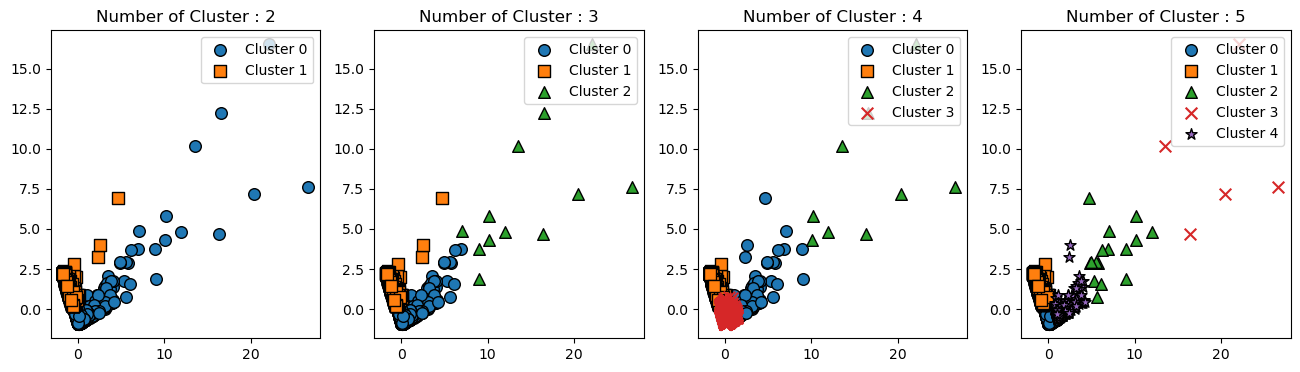

In [284]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled) # 난리 나는데..??

In [285]:
# 로그화 해봅시다
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetray_log'] = np.log1p(cust_df['Monetray'])

# 로그화 한거에 정규화 시전
X_features = cust_df[['Recency_log','Frequency_log','Monetray_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.303


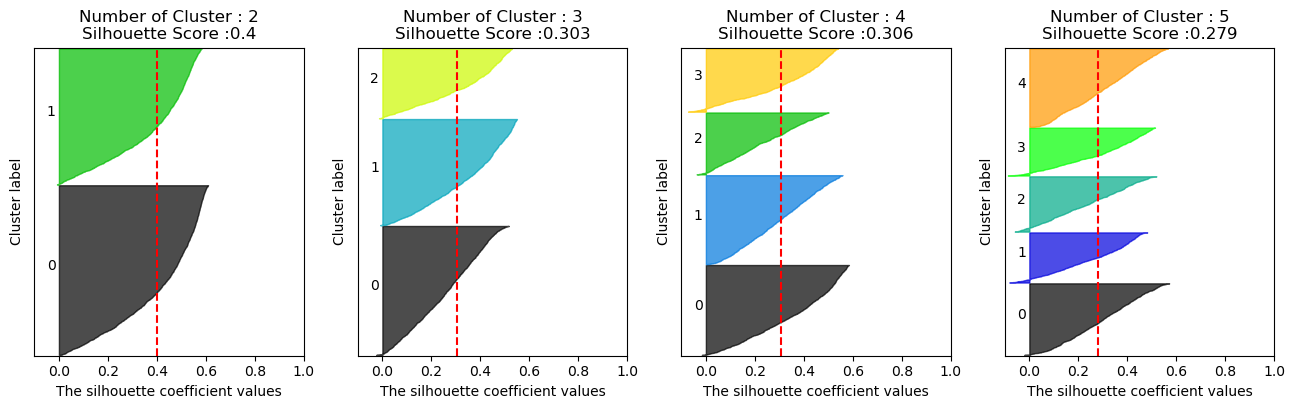

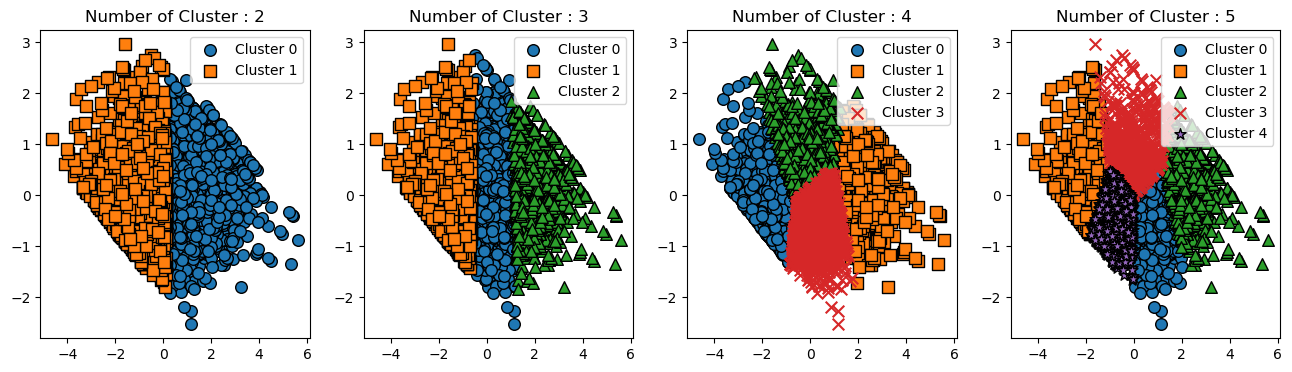

In [286]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled) # 실루엣 계수는 떨어지더라도, 군집화가 더 잘 되어있음을 확인 가능!